In this notebook we're solely going to fetch data from kaggle,
and the take a quick look at it.

In [ ]:
# to download data directly from the kaggle API
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d soumikrakshit/anime-faces
!unzip -qq anime-faces.zip

 97% 428M/441M [00:02<00:00, 155MB/s]
100% 441M/441M [00:02<00:00, 160MB/s]


In [ ]:
import os, shutil

source = 'data'
shutil.rmtree('data/data') # there is an unwanted file inside, we remove it 
n_images = len(os.listdir(source)) # number of images found
print(f'We have {n_images} anime faces in the dataset')

We have 21551 anime faces in the dataset


saving random_anime_faces.png in ./figures ...


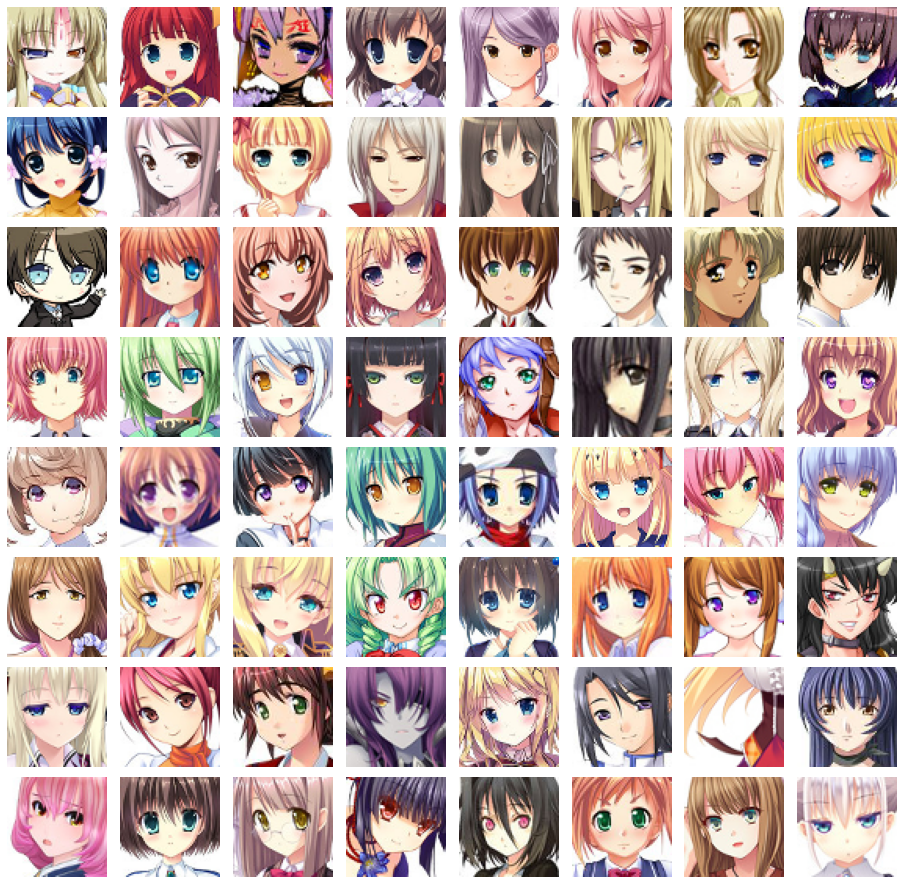

In [ ]:
import matplotlib.pyplot as plt
from utils import DataPreparator # utils is a pre-hand-built library
from utils import save_figure

n_rows, n_cols = 8, 8
fig, axes = plt.subplots(n_rows, n_cols, 
                         figsize=(2*n_cols, 2*n_rows))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

data_preparator = DataPreparator(source, None) # fit the source and flow directly from it
imgs = data_preparator.prepare_real_batch()
for i, ax in enumerate(axes.ravel()):
  ax.imshow(imgs[i])
  ax.set_axis_off()

save_figure('random_anime_faces')

saving anime_mean_face.png in ./figures ...


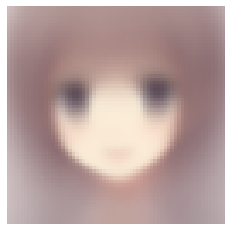

In [ ]:
import numpy as np

# plot the mean of all images -the pixels average-
size = (64, 64)
mean_face = np.zeros(size + (3, ))

data_preparator.reset_index()
n = data_preparator.steps_per_epoch
for _ in range(n):
  imgs = data_preparator.prepare_real_batch()
  mean_face += imgs.mean(axis=0)
mean_face = mean_face / n

plt.imshow(mean_face)
plt.axis('off')
save_figure('anime_mean_face')

the mean image insures us that the data is consistent, because the hair,  the eyes and -to a lesser scale- the mouth, are remarkably in their places, and are sharply noticeable.